<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [6]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [8]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [9]:
## Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ResponseId,65437.0,3.271900e+04,1.889018e+04,1.0,16360.0,32719.0,49078.0,6.543700e+04
CompTotal,33740.0,2.963841e+145,5.444117e+147,0.0,60000.0,110000.0,250000.0,1.000000e+150
WorkExp,29658.0,1.146696e+01,9.168709e+00,0.0,4.0,9.0,16.0,5.000000e+01
JobSatPoints_1,29324.0,1.858109e+01,2.596622e+01,0.0,0.0,10.0,22.0,1.000000e+02
JobSatPoints_4,29393.0,7.522140e+00,1.842266e+01,0.0,0.0,0.0,5.0,1.000000e+02
JobSatPoints_5,29411.0,1.006086e+01,2.183384e+01,0.0,0.0,0.0,10.0,1.000000e+02
JobSatPoints_6,29450.0,2.434323e+01,2.708936e+01,0.0,0.0,20.0,30.0,1.000000e+02
JobSatPoints_7,29448.0,2.296522e+01,2.701774e+01,0.0,0.0,15.0,30.0,1.000000e+02
JobSatPoints_8,29456.0,2.027817e+01,2.610811e+01,0.0,0.0,10.0,25.0,1.000000e+02
JobSatPoints_9,29456.0,1.616943e+01,2.484503e+01,0.0,0.0,5.0,20.0,1.000000e+02


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [10]:
## Write your code here
# Check for null values in the compensation column
missing_comp = df['ConvertedCompYearly'].isnull().sum()
print(f"Number of missing values in ConvertedCompYearly: {missing_comp}")

Number of missing values in ConvertedCompYearly: 42002


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



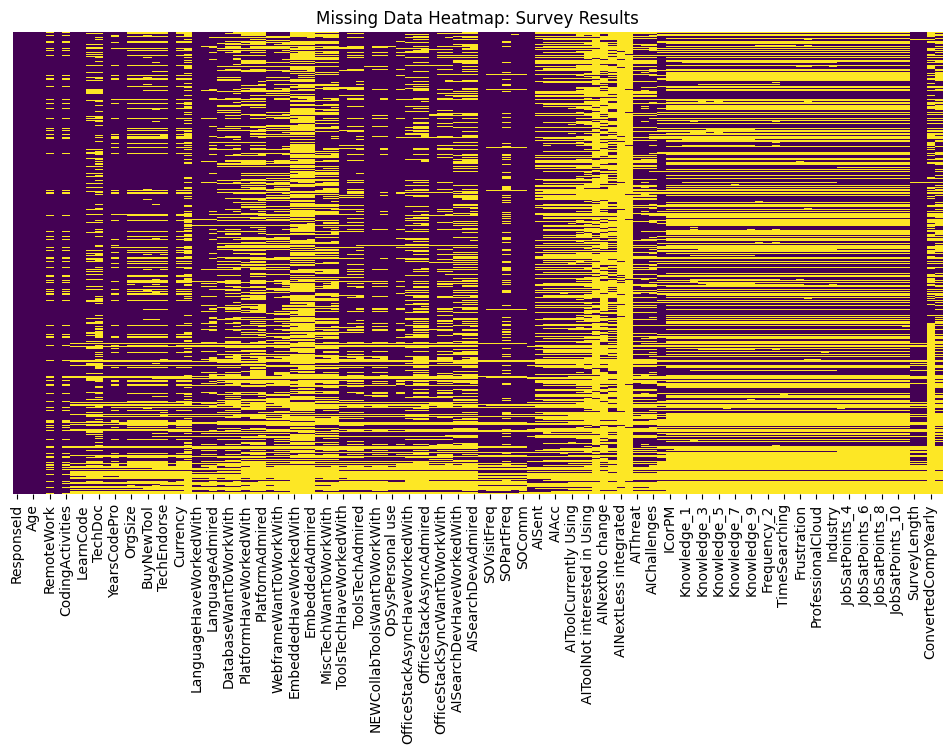

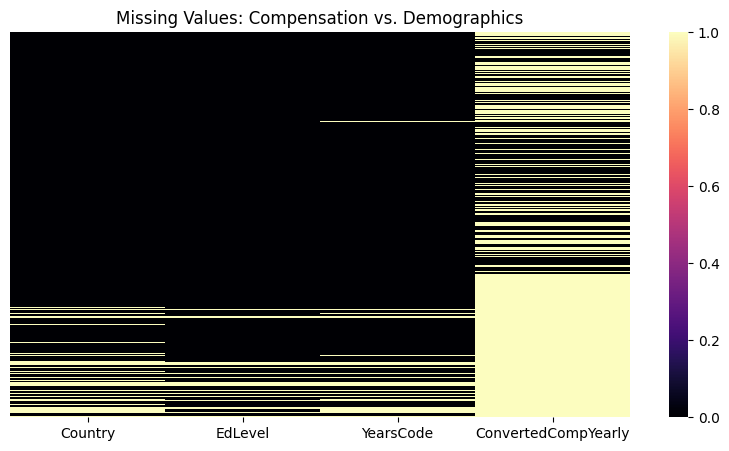

In [12]:
## Write your code here
missing_mask = df.isnull()

# 2. Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_mask, yticklabels=False, cbar=False, cmap='viridis')

plt.title('Missing Data Heatmap: Survey Results')
plt.show()


# Select a subset of columns for a clearer view
subset = df[['Country', 'EdLevel', 'YearsCode', 'ConvertedCompYearly']]

plt.figure(figsize=(10, 5))
sns.heatmap(subset.isnull(), yticklabels=False, cmap='magma')
plt.title('Missing Values: Compensation vs. Demographics')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [13]:
## Write your code here
# Count missing values in the Employment column
missing_employment = df['Employment'].isnull().sum()

print(f"Number of missing rows for Employment: {missing_employment}")


Number of missing rows for Employment: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [14]:
## Write your code here
# Get the frequency of all employment types
employment_counts = df['Employment'].value_counts()

print("Employment Category Frequencies:")
print(employment_counts)

# Identify the majority value (the first item in the sorted series)
majority_value = employment_counts.idxmax()
print(f"\nThe most frequent value is: {majority_value}")

Employment Category Frequencies:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but lo

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [15]:
## Write your code here
# 1. Identify the most frequent value (Mode)
# .mode() returns a Series, so we take the first element [0]
employment_mode = df['Employment'].mode()[0]

print(f"The most frequent Employment value is: {employment_mode}")

# 2. Impute the missing values in the Employment column
df['Employment'].fillna(employment_mode, inplace=True)

# 3. Verify that there are no more missing values
remaining_nulls = df['Employment'].isnull().sum()
print(f"Remaining missing values in Employment: {remaining_nulls}")

The most frequent Employment value is: Employed, full-time
Remaining missing values in Employment: 0


/tmp/ipykernel_299/2082595235.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(employment_mode, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_299/3038018245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Employment', palette='magma', order=df['Employment'].value_counts().index)
/tmp/ipykernel_299/3038018245.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


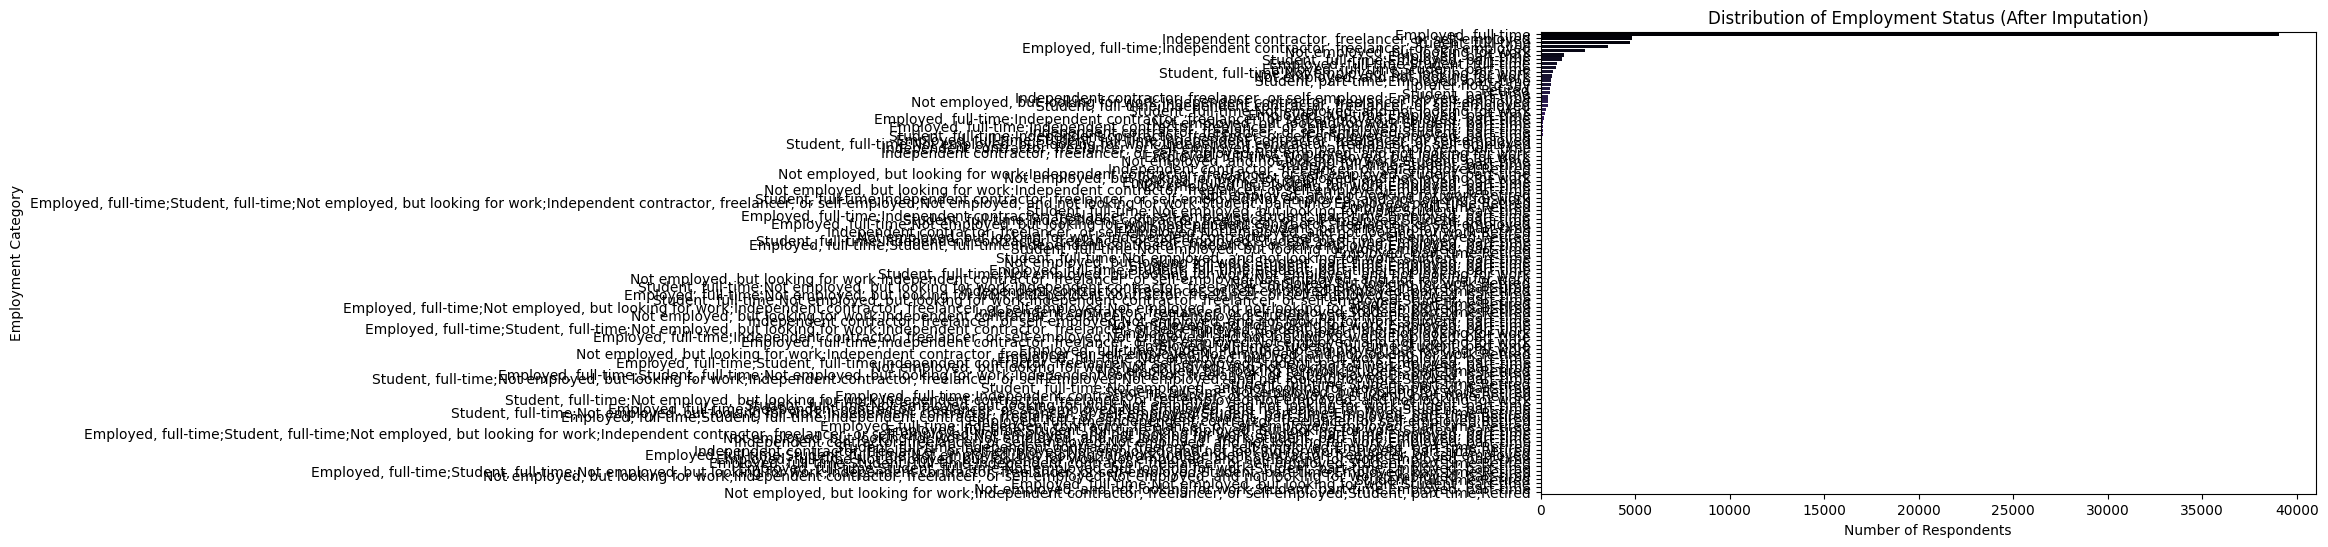

In [16]:
## Write your code here
# Visualization after Employment imputation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Employment', palette='magma', order=df['Employment'].value_counts().index)

plt.title('Distribution of Employment Status (After Imputation)')
plt.xlabel('Number of Respondents')
plt.ylabel('Employment Category')
plt.tight_layout()
plt.savefig('employment_distribution.png')
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
